In [38]:
import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten 
from keras.layers import MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.applications.mobilenet_v2 import MobileNetV2

# 1. Autoencoder

In [12]:
input_img = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 16)          0   

In [13]:
from keras.datasets import cifar10
import numpy as np

(x_train, Y_train), (x_test, Y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

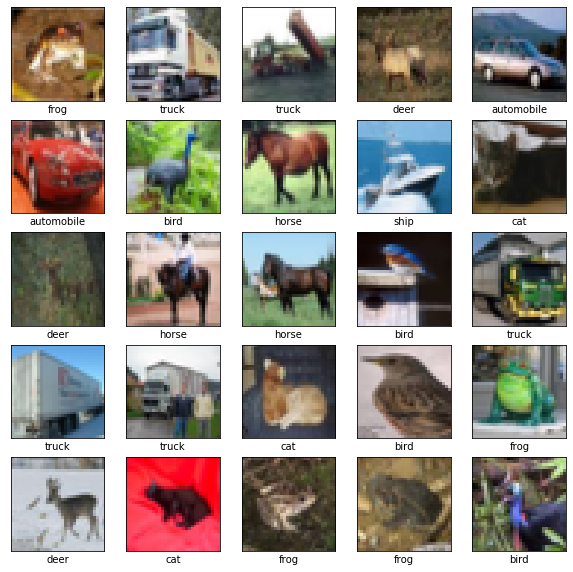

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

In [15]:
hist = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 67s 1ms/step - loss: 0.6038 - accuracy: 0.0115 - val_loss: 0.5873 - val_accuracy: 0.0121
Epoch 2/20
50000/50000 [==============================] - 70s 1ms/step - loss: 0.5842 - accuracy: 0.0120 - val_loss: 0.5829 - val_accuracy: 0.0121
Epoch 3/20
50000/50000 [==============================] - 72s 1ms/step - loss: 0.5811 - accuracy: 0.0120 - val_loss: 0.5818 - val_accuracy: 0.0121
Epoch 4/20
50000/50000 [==============================] - 76s 2ms/step - loss: 0.5793 - accuracy: 0.0120 - val_loss: 0.5798 - val_accuracy: 0.0121
Epoch 5/20
50000/50000 [==============================] - 77s 2ms/step - loss: 0.5779 - accuracy: 0.0120 - val_loss: 0.5803 - val_accuracy: 0.0121
Epoch 6/20
50000/50000 [==============================] - 75s 1ms/step - loss: 0.5770 - accuracy: 0.0120 - val_loss: 0.5770 - val_accuracy: 0.0121
Epoch 7/20
50000/50000 [==============================] - 107s 2ms/s

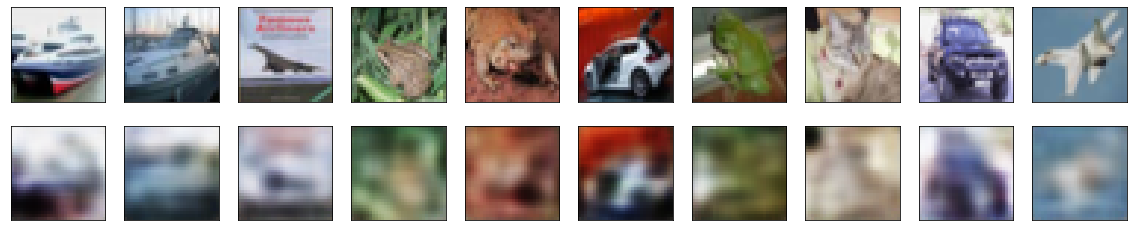

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


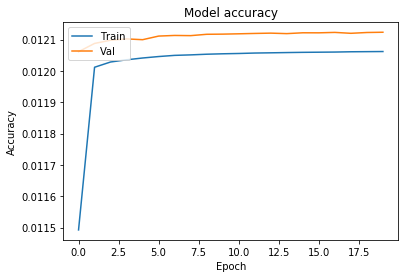

In [20]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

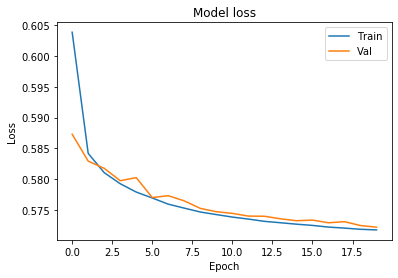

In [21]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

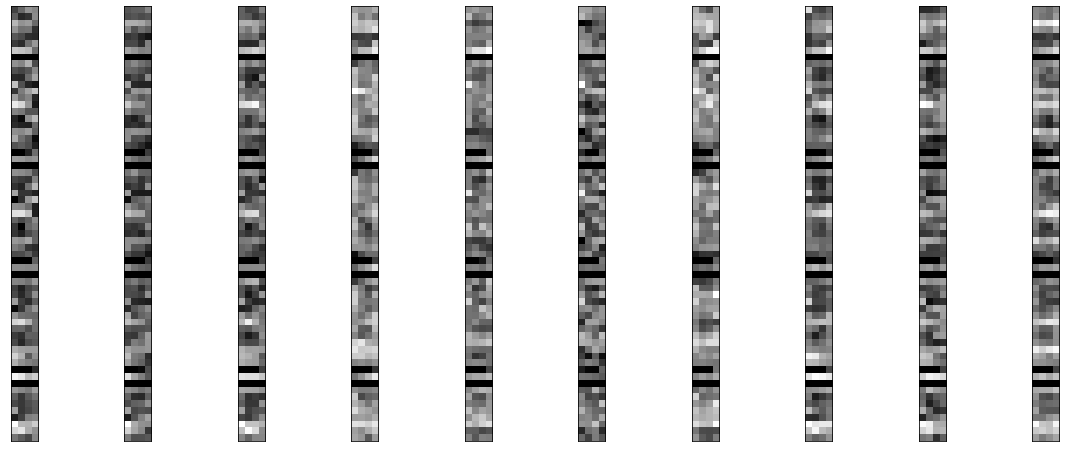

In [23]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 16)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2. Image Classification
## 2.1 Deep CNN

In [26]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [28]:
# Fit data to model
hist2 = model.fit(x_train, Y_train,
            batch_size=50,
            epochs=10,
            verbose=1,
            validation_split=0.2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 29s 723us/step - loss: 1.3683 - accuracy: 0.5021 - val_loss: 1.2518 - val_accuracy: 0.5536
Epoch 2/10
40000/40000 [==============================] - 37s 918us/step - loss: 1.1092 - accuracy: 0.6052 - val_loss: 1.0417 - val_accuracy: 0.6338
Epoch 3/10
40000/40000 [==============================] - 30s 743us/step - loss: 0.9611 - accuracy: 0.6610 - val_loss: 0.9645 - val_accuracy: 0.6642
Epoch 4/10
40000/40000 [==============================] - 28s 709us/step - loss: 0.8587 - accuracy: 0.6995 - val_loss: 0.9116 - val_accuracy: 0.6859
Epoch 5/10
40000/40000 [==============================] - 29s 724us/step - loss: 0.7637 - accuracy: 0.7308 - val_loss: 0.8946 - val_accuracy: 0.6883
Epoch 6/10
40000/40000 [==============================] - 30s 751us/step - loss: 0.6937 - accuracy: 0.7563 - val_loss: 0.8789 - val_accuracy: 0.7038
Epoch 7/10
40000/40000 [==============================] 

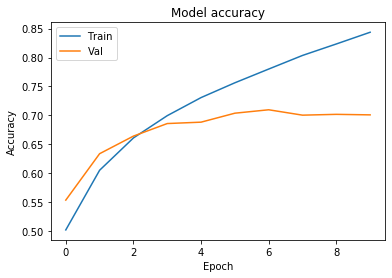

In [29]:
#Visualize the models accuracy
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

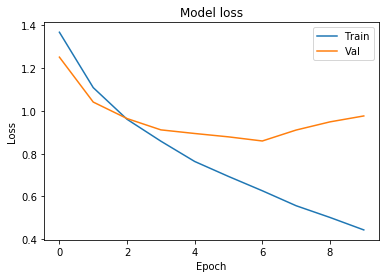

In [30]:
#Visualize the models loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [31]:
# Generate generalization metrics
score = model.evaluate(x_test, Y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.0045157000541687 / Test accuracy: 0.6917999982833862


## 2.2 Transfer Learning

In [39]:
# create the base pre-trained model
base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model_tl = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_tl.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_10[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
____________________________________________________________________________________________

In [40]:
# Fit data to model
hist3 = model_tl.fit(x_train, Y_train,
            batch_size=50,
            epochs=10,
            verbose=1,
            validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.9137 - accuracy: 0.3350 - val_loss: 2.3363 - val_accuracy: 0.0996
Epoch 2/10
40000/40000 [==============================] - 55s 1ms/step - loss: 1.7529 - accuracy: 0.3775 - val_loss: 2.3325 - val_accuracy: 0.1071
Epoch 3/10
40000/40000 [==============================] - 57s 1ms/step - loss: 1.7240 - accuracy: 0.3882 - val_loss: 2.3513 - val_accuracy: 0.1023
Epoch 4/10
40000/40000 [==============================] - 57s 1ms/step - loss: 1.7017 - accuracy: 0.3948 - val_loss: 2.3678 - val_accuracy: 0.0992
Epoch 5/10
40000/40000 [==============================] - 59s 1ms/step - loss: 1.6802 - accuracy: 0.4050 - val_loss: 2.3736 - val_accuracy: 0.1091
Epoch 6/10
40000/40000 [==============================] - 61s 2ms/step - loss: 1.6670 - accuracy: 0.4087 - val_loss: 2.3793 - val_accuracy: 0.1106
Epoch 7/10
40000/40000 [==============================] - 59s 1ms/st

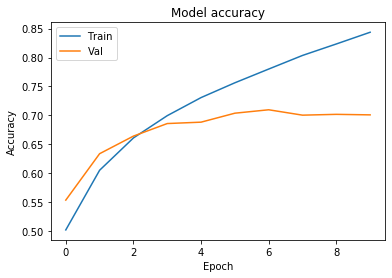

In [41]:
#Visualize the models accuracy
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

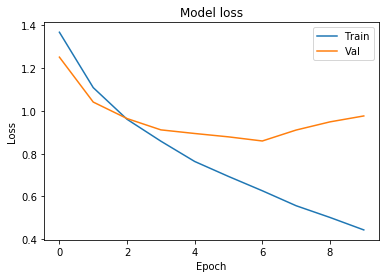

In [42]:
#Visualize the models loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [44]:
# Generate generalization metrics
score = model_tl.evaluate(x_test, Y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.386014602661133 / Test accuracy: 0.10620000213384628


# 3. Text Classification
## 3.1 RNN



In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

df = pd.read_csv("SPAM_detection.csv")
df.head(1)

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0


In [80]:
X = df['Message']
Y = df['category_val']
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)

In [81]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [82]:
inputs = Input(name='inputs',shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(64)(layer)
layer = Dense(256,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1,name='out_layer')(layer)
layer = Activation('sigmoid')(layer)
model_rnn = Model(inputs=inputs,outputs=layer)

In [83]:
model_rnn.summary()
model_rnn.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

In [84]:
hist4 = model_rnn.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

/Users/zihe/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3565 samples, validate on 892 samples
Epoch 1/10
3565/3565 [==============================] - 4s 1ms/step - loss: 0.3442 - accuracy: 0.8668 - val_loss: 0.2334 - val_accuracy: 0.9025
Epoch 2/10
3565/3565 [==============================] - 4s 1ms/step - loss: 0.1047 - accuracy: 0.9759 - val_loss: 0.0815 - val_accuracy: 0.9798
Epoch 3/10
3565/3565 [==============================] - 4s 1ms/step - loss: 0.0468 - accuracy: 0.9874 - val_loss: 0.0694 - val_accuracy: 0.9809
Epoch 4/10
3565/3565 [==============================] - 4s 1ms/step - loss: 0.0376 - accuracy: 0.9891 - val_loss: 0.0591 - val_accuracy: 0.9798
Epoch 5/10
3565/3565 [==============================] - 4s 1ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.0615 - val_accuracy: 0.9832


In [85]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model_rnn.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1115/1115 [==============================] - 0s 372us/step
Test set
  Loss: 0.056
  Accuracy: 0.982


## 3.2 CNN

In [87]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

# calculate the maximum document length
def max_length(lines):
	return max([len(s.split()) for s in lines])

# encode a list of lines
def encode_text(tokenizer, lines, length):
	# integer encode
	encoded = tokenizer.texts_to_sequences(lines)
	# pad encoded sequences
	padded = pad_sequences(encoded, maxlen=length, padding='post')
	return padded

df = pd.read_csv("SPAM_detection.csv")
X = df['Message']
Y = df['category_val']
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

length = max_length(X_train)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Max document length: %d' % length)
print('Vocabulary size: %d' % vocab_size)
# encode data
X_train = encode_text(tokenizer, X_train, length)
X_test = encode_text(tokenizer, X_test, length)
print(X_train.shape)
print(X_test.shape)

Max document length: 171
Vocabulary size: 7943
(4457, 171)
(1115, 171)


In [75]:
# define the model
def define_model(length, vocab_size):
	# channel 1
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 100)(inputs1)
	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
	# channel 2
	inputs2 = Input(shape=(length,))
	embedding2 = Embedding(vocab_size, 100)(inputs2)
	conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)
	# channel 3
	inputs3 = Input(shape=(length,))
	embedding3 = Embedding(vocab_size, 100)(inputs3)
	conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D(pool_size=2)(drop3)
	flat3 = Flatten()(pool3)
	# merge
	merged = concatenate([flat1, flat2, flat3])
	# interpretation
	dense1 = Dense(10, activation='relu')(merged)
	outputs = Dense(1, activation='sigmoid')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	return model

# define model
model = define_model(length, vocab_size)
# fit model
hist5 = model.fit( [X_train,X_train, X_train],Y_train, epochs=10, batch_size=16, validation_split=0.2)

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 171)          0                                            
__________________________________________________________________________________________________
input_21 (InputLayer)           (None, 171)          0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           (None, 171)          0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 171, 100)     794300      input_20[0][0]                   
___________________________________________________________________________________________

/Users/zihe/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3565 samples, validate on 892 samples
Epoch 1/10
3565/3565 [==============================] - 9s 2ms/step - loss: 0.2096 - accuracy: 0.9332 - val_loss: 0.1498 - val_accuracy: 0.9787
Epoch 2/10
3565/3565 [==============================] - 8s 2ms/step - loss: 0.0892 - accuracy: 0.9893 - val_loss: 0.0620 - val_accuracy: 0.9821
Epoch 3/10
3565/3565 [==============================] - 8s 2ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0622 - val_accuracy: 0.9843
Epoch 4/10
3565/3565 [==============================] - 8s 2ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0465 - val_accuracy: 0.9865
Epoch 5/10
3565/3565 [==============================] - 9s 2ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0518 - val_accuracy: 0.9865
Epoch 6/10
3565/3565 [==============================] - 8s 2ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0489 - val_accuracy: 0.9888
Epoch 7/10
3565/3565 [==============================] - 9s 2ms/step - loss: 4.7979e-04 - 

In [77]:
# evaluate model on test dataset dataset
accr = model.evaluate([X_test, X_test, X_test], Y_test, verbose=0)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.074
  Accuracy: 0.986


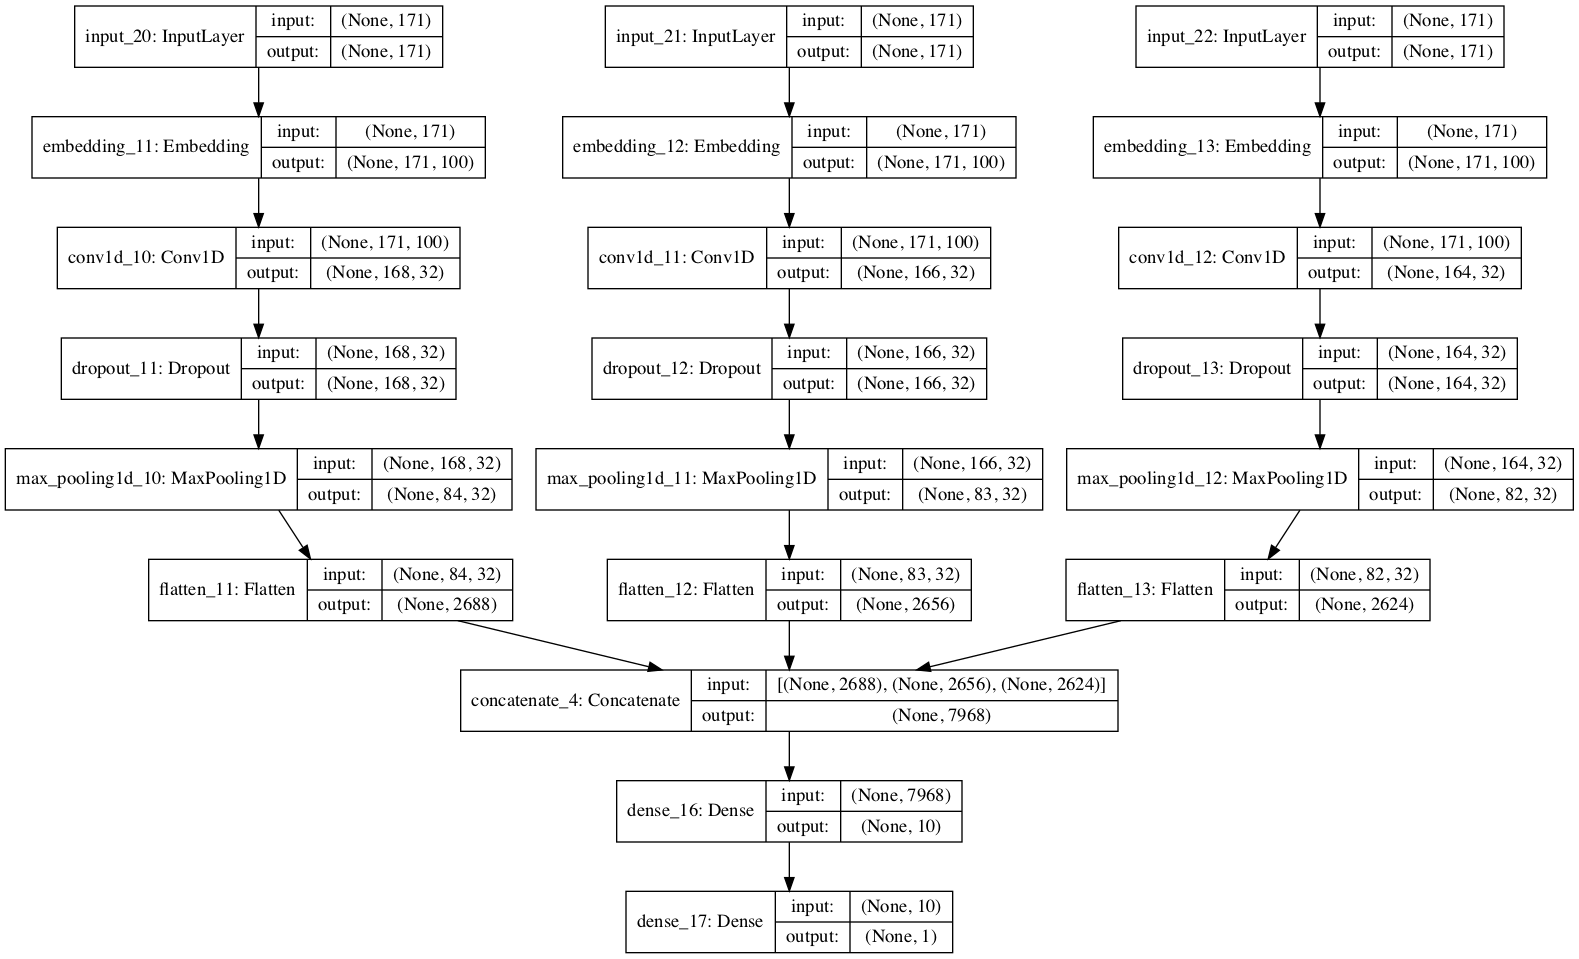

In [78]:
plot_model(model, show_shapes=True, to_file='multichannel.png')

## 3.3

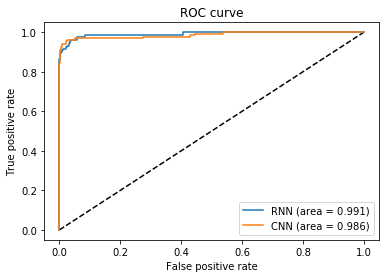

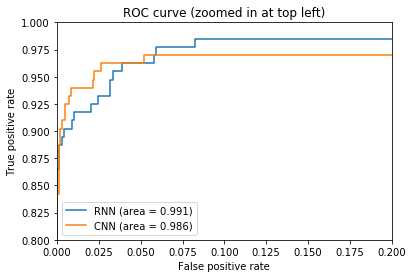

In [92]:
from sklearn.metrics import roc_curve
y_pred_rnn = model_rnn.predict(test_sequences_matrix).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(Y_test, y_pred_rnn)
from sklearn.metrics import auc
auc_rnn = auc(fpr_rnn, tpr_rnn)

y_pred_cnn = model.predict([X_test, X_test, X_test]).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(Y_test, y_pred_cnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()